# Arctic Project: Future Predict in Random Forest

## Load libraries

In [1]:
library(MASS)
library(tidyverse)
library(randomForest)

── Attaching packages ──────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ─────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [2]:
arctic <- read.csv("arctic_data.csv",stringsAsFactors = F)
#future_data <- read.csv("future_dataset.csv",stringsAsFactors = F)
visulization_data <- read.csv("visulization2.csv",stringsAsFactors = F)
tool <- read.csv("tool2.csv",stringsAsFactors = F)
ozone_plus <- read.csv("ozone+.csv",stringsAsFactors = F)
ozone_minus <- read.csv("ozone-.csv",stringsAsFactors = F)
future <- read.csv("future=.csv",stringsAsFactors = F)

In [3]:
model <- randomForest(Extent~Rainfall+Daylight+Population+CO2+Ozone
                              +OceanTemperature_NorthernHemisphere
                              +LandTemperature_NorthernHemisphere
                              +MinTemperature_NorthSlopeAlaska
                              +GDP_WORLD,
                              data=arctic, mtry=5, ntree=200)

In [4]:
future = predict(model,future)
future_ozone_plus = predict(model,ozone_plus)
future_ozone_minus = predict(model,ozone_minus)

pred <- cbind(tool,as.data.frame(future),
              as.data.frame(future_ozone_plus),
              as.data.frame(future_ozone_minus))

In [5]:
#pred["prediction"] <- (pred$predict*(16.09-3.57)+3.57)
pred["future="] <- (pred$future*(16.09-3.57)+3.57)
pred["ozone+"] <- (pred$future_ozone_plus*(16.09-3.57)+3.57)
pred["ozone-"] <- (pred$future_ozone_minus*(16.09-3.57)+3.57)

In [6]:
result <- left_join(visulization_data, pred, by="observation")
#result
write.csv(result, file="6.2result.csv")

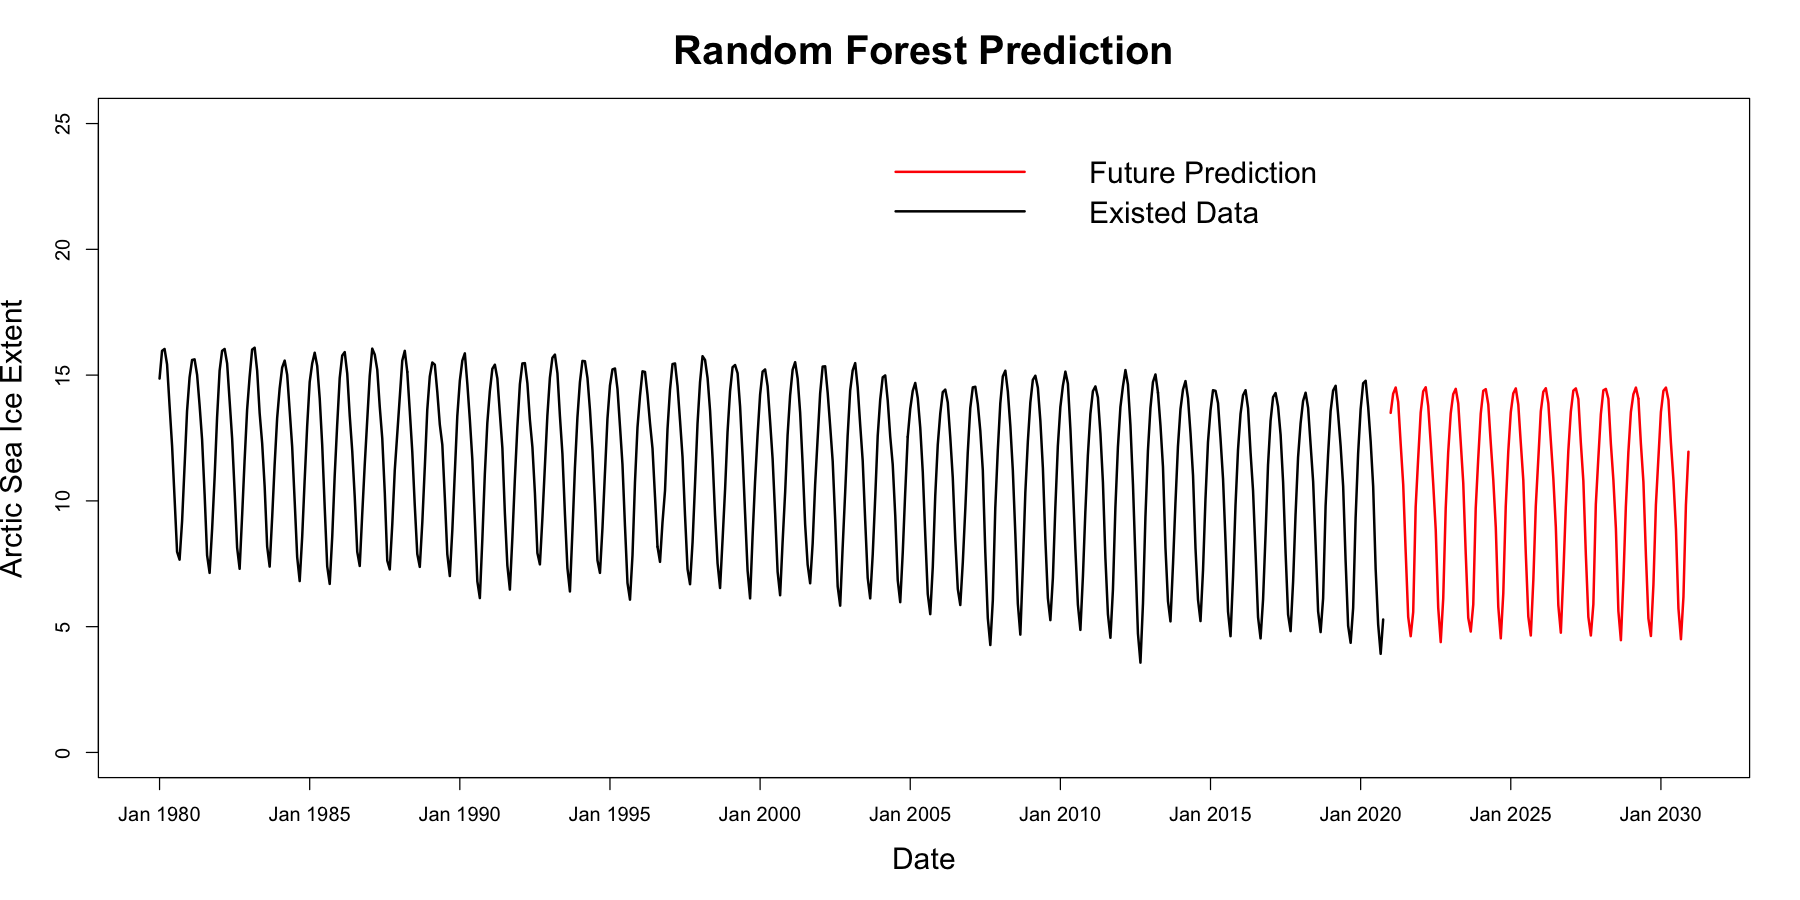

In [9]:
# figure size
options(repr.plot.width=15, repr.plot.height=7.5)

# plot
plot(result$observation,result$Extent,type ='l',ylim = c(0,25),lwd = '2',
     xlab = "Date", ylab = "Arctic Sea Ice Extent",xaxt='n',cex.lab = 1.5)

# attributes of prediction lines
lines(result$observation,result$"future=",lty=1,col='red',lwd = '2')
#lines(result$observation,result$"ozone+",lty=1,col='blue',lwd = '2')
#lines(result$observation,result$"ozone-",lty=1,col='green',lwd = '2')


# x-axis labels
axis(1,at=c(1,61,121,181,241,301,361,421,481,541,601),
   labels=c("Jan 1980","Jan 1985","Jan 1990","Jan 1995","Jan 2000","Jan 2005","Jan 2010","Jan 2015","Jan 2020","Jan 2025","Jan 2030"))

# title
title(main = list("Random Forest Prediction", cex = 2, col = "black", font = 2))

# legend
legend("topright",inset=.05,c("Future Prediction","Existed Data"),
       bty = 'n',lty=c(1, 1),col=c("red", "black"),lwd =c(2, 2),cex = 1.5)